In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [2]:
def wrangle(filepath):
    #Read CSV file into dataframe
    df = pd.read_csv(filepath)

    #Subset to properties in Capital Federal
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")

    #Subset to 'appartments'
    mask_apt = df["property_type"] == "apartment"

    #Subset to properties where it is less than 400,000 USD
    mask_price = df["price_aprox_usd"] < 400_000

    df = df[mask_ba & mask_apt & mask_price]

    #Removing outliers by "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low,high)

    df = df[mask_area]

    return df

In [3]:
# Using wrangle function to create a DataFrame df from the CSV file
df = wrangle("Data/buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()


df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


Text(0.5, 1.0, 'Distribution of Apartment Sizes')

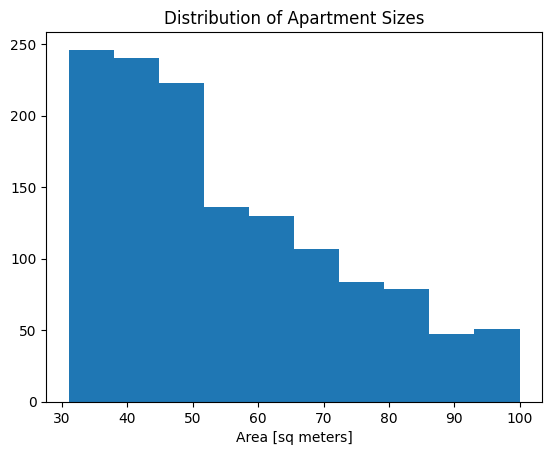

In [4]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes")

In [5]:
df.describe()["surface_covered_in_m2"]

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

Text(0.5, 1.0, 'Buneous Aries: Price vs Area')

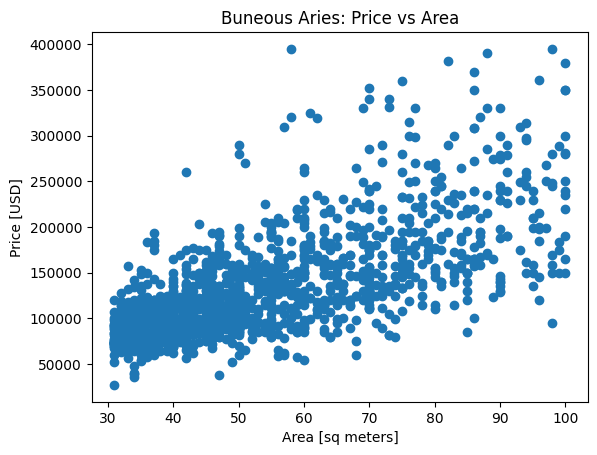

In [22]:
#Scatter Plot Showing Price vs Area
plt.scatter(x= df["surface_covered_in_m2"], y= df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buneous Aries: Price vs Area")

In [6]:
#Training the model
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.head

<bound method NDFrame.head of       surface_covered_in_m2
4                      70.0
9                      42.0
29                     54.0
40                     42.0
41                     50.0
...                     ...
8589                   42.0
8590                   41.0
8593                   43.0
8601                   70.0
8604                   52.0

[1343 rows x 1 columns]>

In [7]:
#Creating target vector model for training data
target = "price_aprox_usd"
y_train = df[target]

In [8]:
#Calculate the mean  target vector
y_mean = y_train.mean()
y_mean

135527.83871928515

In [9]:
#Creating a list named y_pred_baseline that contains the value of y_mean repeated.
y_pred_baseline = [y_mean] * len(y_train)

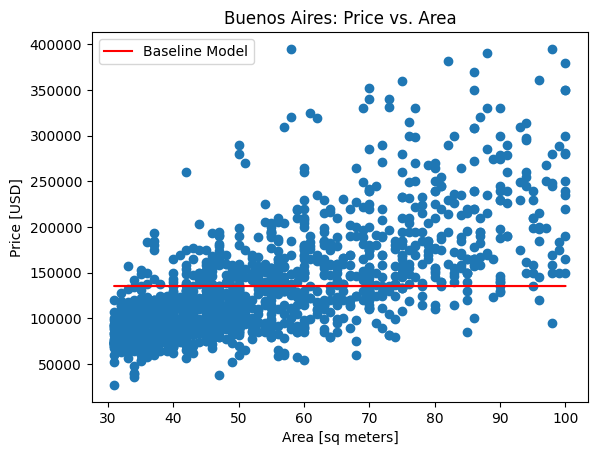

In [10]:
#Adding a line to the plot that shows the relationship between the observations

plt.plot(X_train, y_pred_baseline, color="red", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

In [ ]:
#Calculating Mean Absolute Error for Baseline

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean,2))
print("Baseline MAE:", round(mae_baseline,2))

Mean apt price 135527.84
Baseline MAE: 45199.46


In [12]:
#Instantitating a Linear Regression model
model = LinearRegression()

In [13]:
#Fitting model to a data
model.fit(X_train, y_train)

LinearRegression()

In [16]:
#Generating predictions using trained model
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [17]:
#Calculating the mean absolute error for a list of predictions
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


In [18]:
#Extracting the intercept from model
intercept = round(model.intercept_,2)
print("Model Intercept:", intercept)

Model Intercept: 11433.31


In [19]:
# Extracting the coefficient 
coefficient = round(model.coef_[0],2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)

Model coefficient for "surface_covered_in_m2": 2253.12


In [21]:
#Generating equation for model
print(f"apt_price = {intercept} + {coefficient} * surface_covered")

apt_price = 11433.31 + 2253.12 * surface_covered


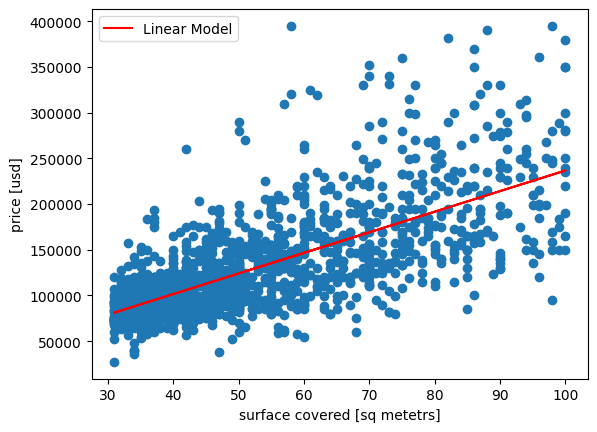

In [22]:
#Plotting the model
plt.plot(X_train, model.predict(X_train), color="red", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq metetrs]")
plt.ylabel("price [usd]")
plt.legend();